In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%matplotlib inline 

In [2]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churnData['TotalCharges'] = pd.to_numeric(churnData["TotalCharges"], errors='coerce', downcast=None)

In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
churnData.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [9]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#fill Nan with mean

In [11]:
#Finding the mean of the column having NaN 
mean_value=churnData['TotalCharges'].mean() 
  
# Replace NaNs in column S2 with the 
# mean of values in the same column 
churnData['TotalCharges'].fillna(value=mean_value, inplace=True)

In [12]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# only use these columns for further work `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:

In [14]:
X = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]

In [15]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [16]:
y = churnData['Churn']

In [17]:
#turn yes and no from the column to 1/0
y = y.apply(lambda x: 1 if x=='Yes' else 0)

In [18]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [19]:
#split the Data in train and test

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'SeniorCitizen'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

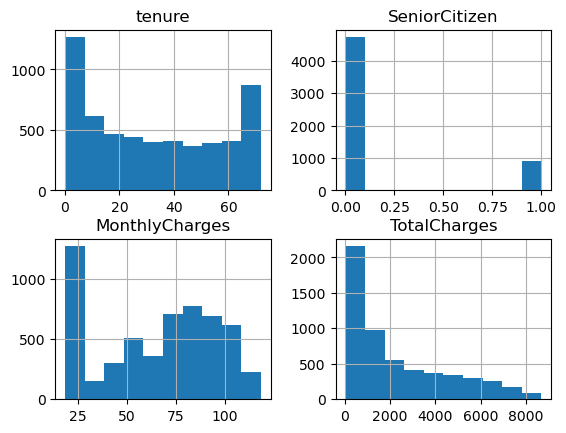

In [21]:
X_train.hist()

In [22]:
#make new DF for x_train and x_test without Senior Citizens and concat it later with old 

In [23]:
X_train_without = X_train.drop(['SeniorCitizen'], axis=1)

In [24]:
X_train_without

,tenure,MonthlyCharges,TotalCharges
2142,21,64.85,1336.800000
1623,54,97.20,5129.450000
6074,1,23.45,23.450000
1362,4,70.20,237.950000
6754,0,61.90,2283.300441
...,...,...,...
3772,1,95.00,95.000000
5191,23,91.10,2198.300000
5226,12,21.15,306.050000
5390,12,99.45,1200.150000


In [25]:
X_test_without = X_test.drop(['SeniorCitizen'], axis = 1)

In [26]:
X_test_without

,tenure,MonthlyCharges,TotalCharges
185,1,24.80,24.80
2715,41,25.25,996.45
3825,52,19.35,1031.70
1807,1,76.35,76.35
132,67,50.55,3260.10
...,...,...,...
6366,64,68.30,4378.80
315,51,110.05,5686.40
2439,17,19.90,329.75
5002,69,43.95,2960.10


In [27]:
#use StandartScaler but not on Senior Citizens

In [28]:
scaler = StandardScaler()
scaler.fit(X_train_without)
X_train_scaled = scaler.transform(X_train_without)
X_test_scaled = scaler.transform(X_test_without)

In [29]:
# make X.. a DF and add senior citizens

In [30]:
X_test_without1 = pd.DataFrame(X_test_without, columns = X_test_without.columns, index= X_test.index)

In [31]:
X_test_without1

,tenure,MonthlyCharges,TotalCharges
185,1,24.80,24.80
2715,41,25.25,996.45
3825,52,19.35,1031.70
1807,1,76.35,76.35
132,67,50.55,3260.10
...,...,...,...
6366,64,68.30,4378.80
315,51,110.05,5686.40
2439,17,19.90,329.75
5002,69,43.95,2960.10


In [32]:
X_test_without1['SeniorCitizen'] = X_test['SeniorCitizen']

In [33]:
X_test_without1

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
185,1,24.80,24.80,0
2715,41,25.25,996.45,0
3825,52,19.35,1031.70,0
1807,1,76.35,76.35,0
132,67,50.55,3260.10,0
...,...,...,...,...
6366,64,68.30,4378.80,0
315,51,110.05,5686.40,0
2439,17,19.90,329.75,0
5002,69,43.95,2960.10,0


In [34]:
#do the same with X_train

In [35]:
X_train_without1 = pd.DataFrame(X_train_without, columns = X_train_without.columns, index= X_train.index)

In [36]:
X_train_without1['SeniorCitizen'] = X_train['SeniorCitizen']

In [37]:
X_train_without1

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
2142,21,64.85,1336.800000,0
1623,54,97.20,5129.450000,0
6074,1,23.45,23.450000,0
1362,4,70.20,237.950000,0
6754,0,61.90,2283.300441,0
...,...,...,...,...
3772,1,95.00,95.000000,0
5191,23,91.10,2198.300000,0
5226,12,21.15,306.050000,0
5390,12,99.45,1200.150000,1


In [38]:
log_model = LogisticRegression() 



#where the magic happens

log_model.fit(X_train_without1, y_train)

y_pred_train_log = log_model.predict(X_train_without1)
y_pred_test_log = log_model.predict(X_test_without1)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.786475,0.810504
1,Precision,0.640460,0.719008
2,Recall,0.446524,0.466488


In [39]:
#use KNN

In [40]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_without1, y_train) # train model
y_pred = model.predict(X_test_without1) # predict test
y_pred_train=model.predict(X_train_without1) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.828541,0.782825
1,Precision,0.736607,0.615120
2,Recall,0.551471,0.479893


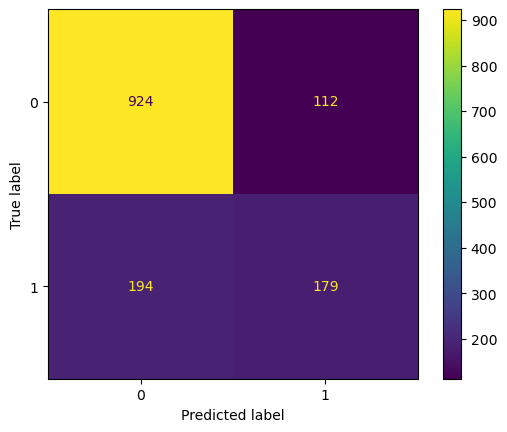

In [41]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [42]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test


In [43]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.83,0.78
1,Precision,0.74,0.62
2,Recall,0.55,0.48


In [44]:
y_train_vs_predicted # train labels

,Real,Predicted
2142,0,0
1623,0,0
6074,1,1
1362,1,0
6754,0,0
...,...,...
3772,1,1
5191,0,0
5226,0,0
5390,1,1


In [45]:
y_test_vs_predicted # test labels

,Real,Predicted
185,1,0
2715,0,0
3825,0,0
1807,1,1
132,0,0
...,...,...
6366,0,0
315,0,0
2439,0,0
5002,0,0


In [46]:
#Fit a Decision Tree Classifier on the training data.

In [47]:
# split the data again to work with the unscaled data

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=4)  #-> hight dept means better on trian, less good on test

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


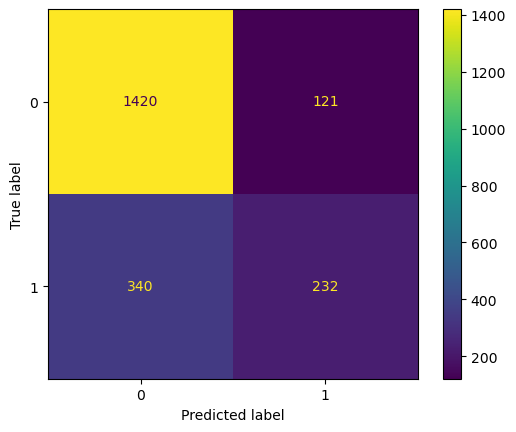

In [49]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

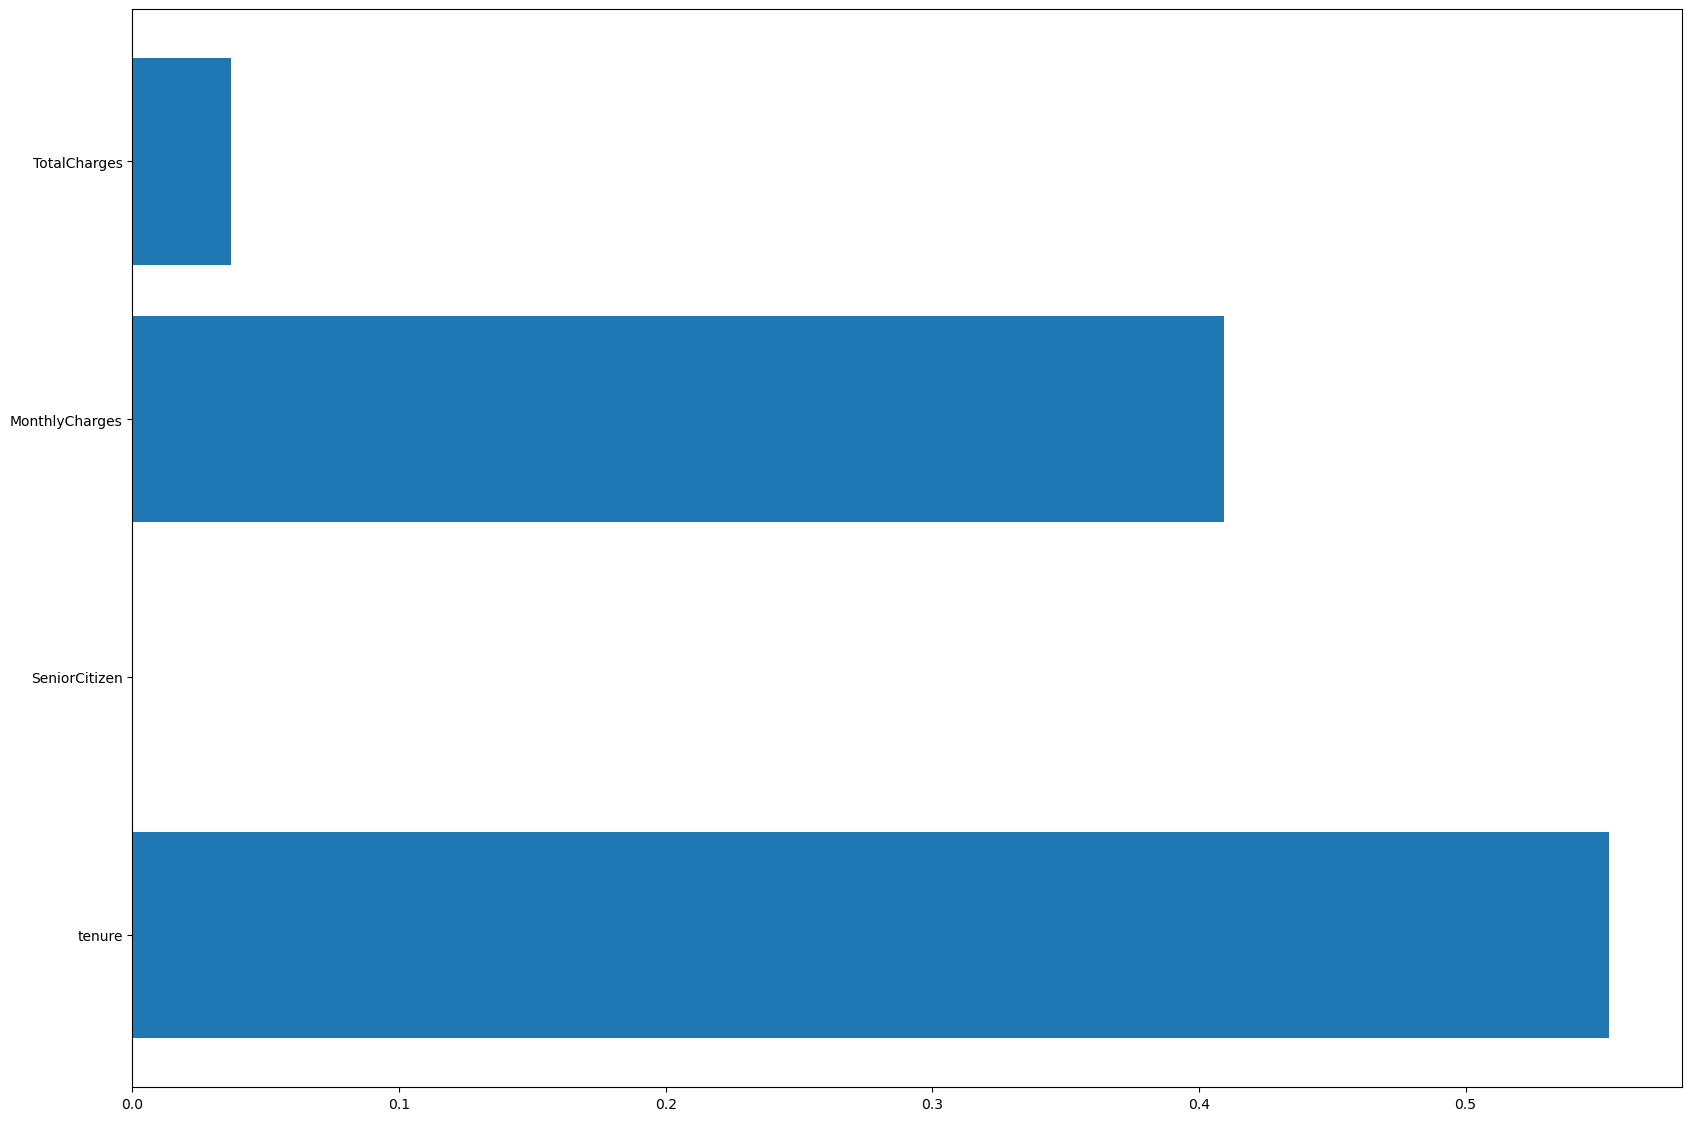

In [50]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

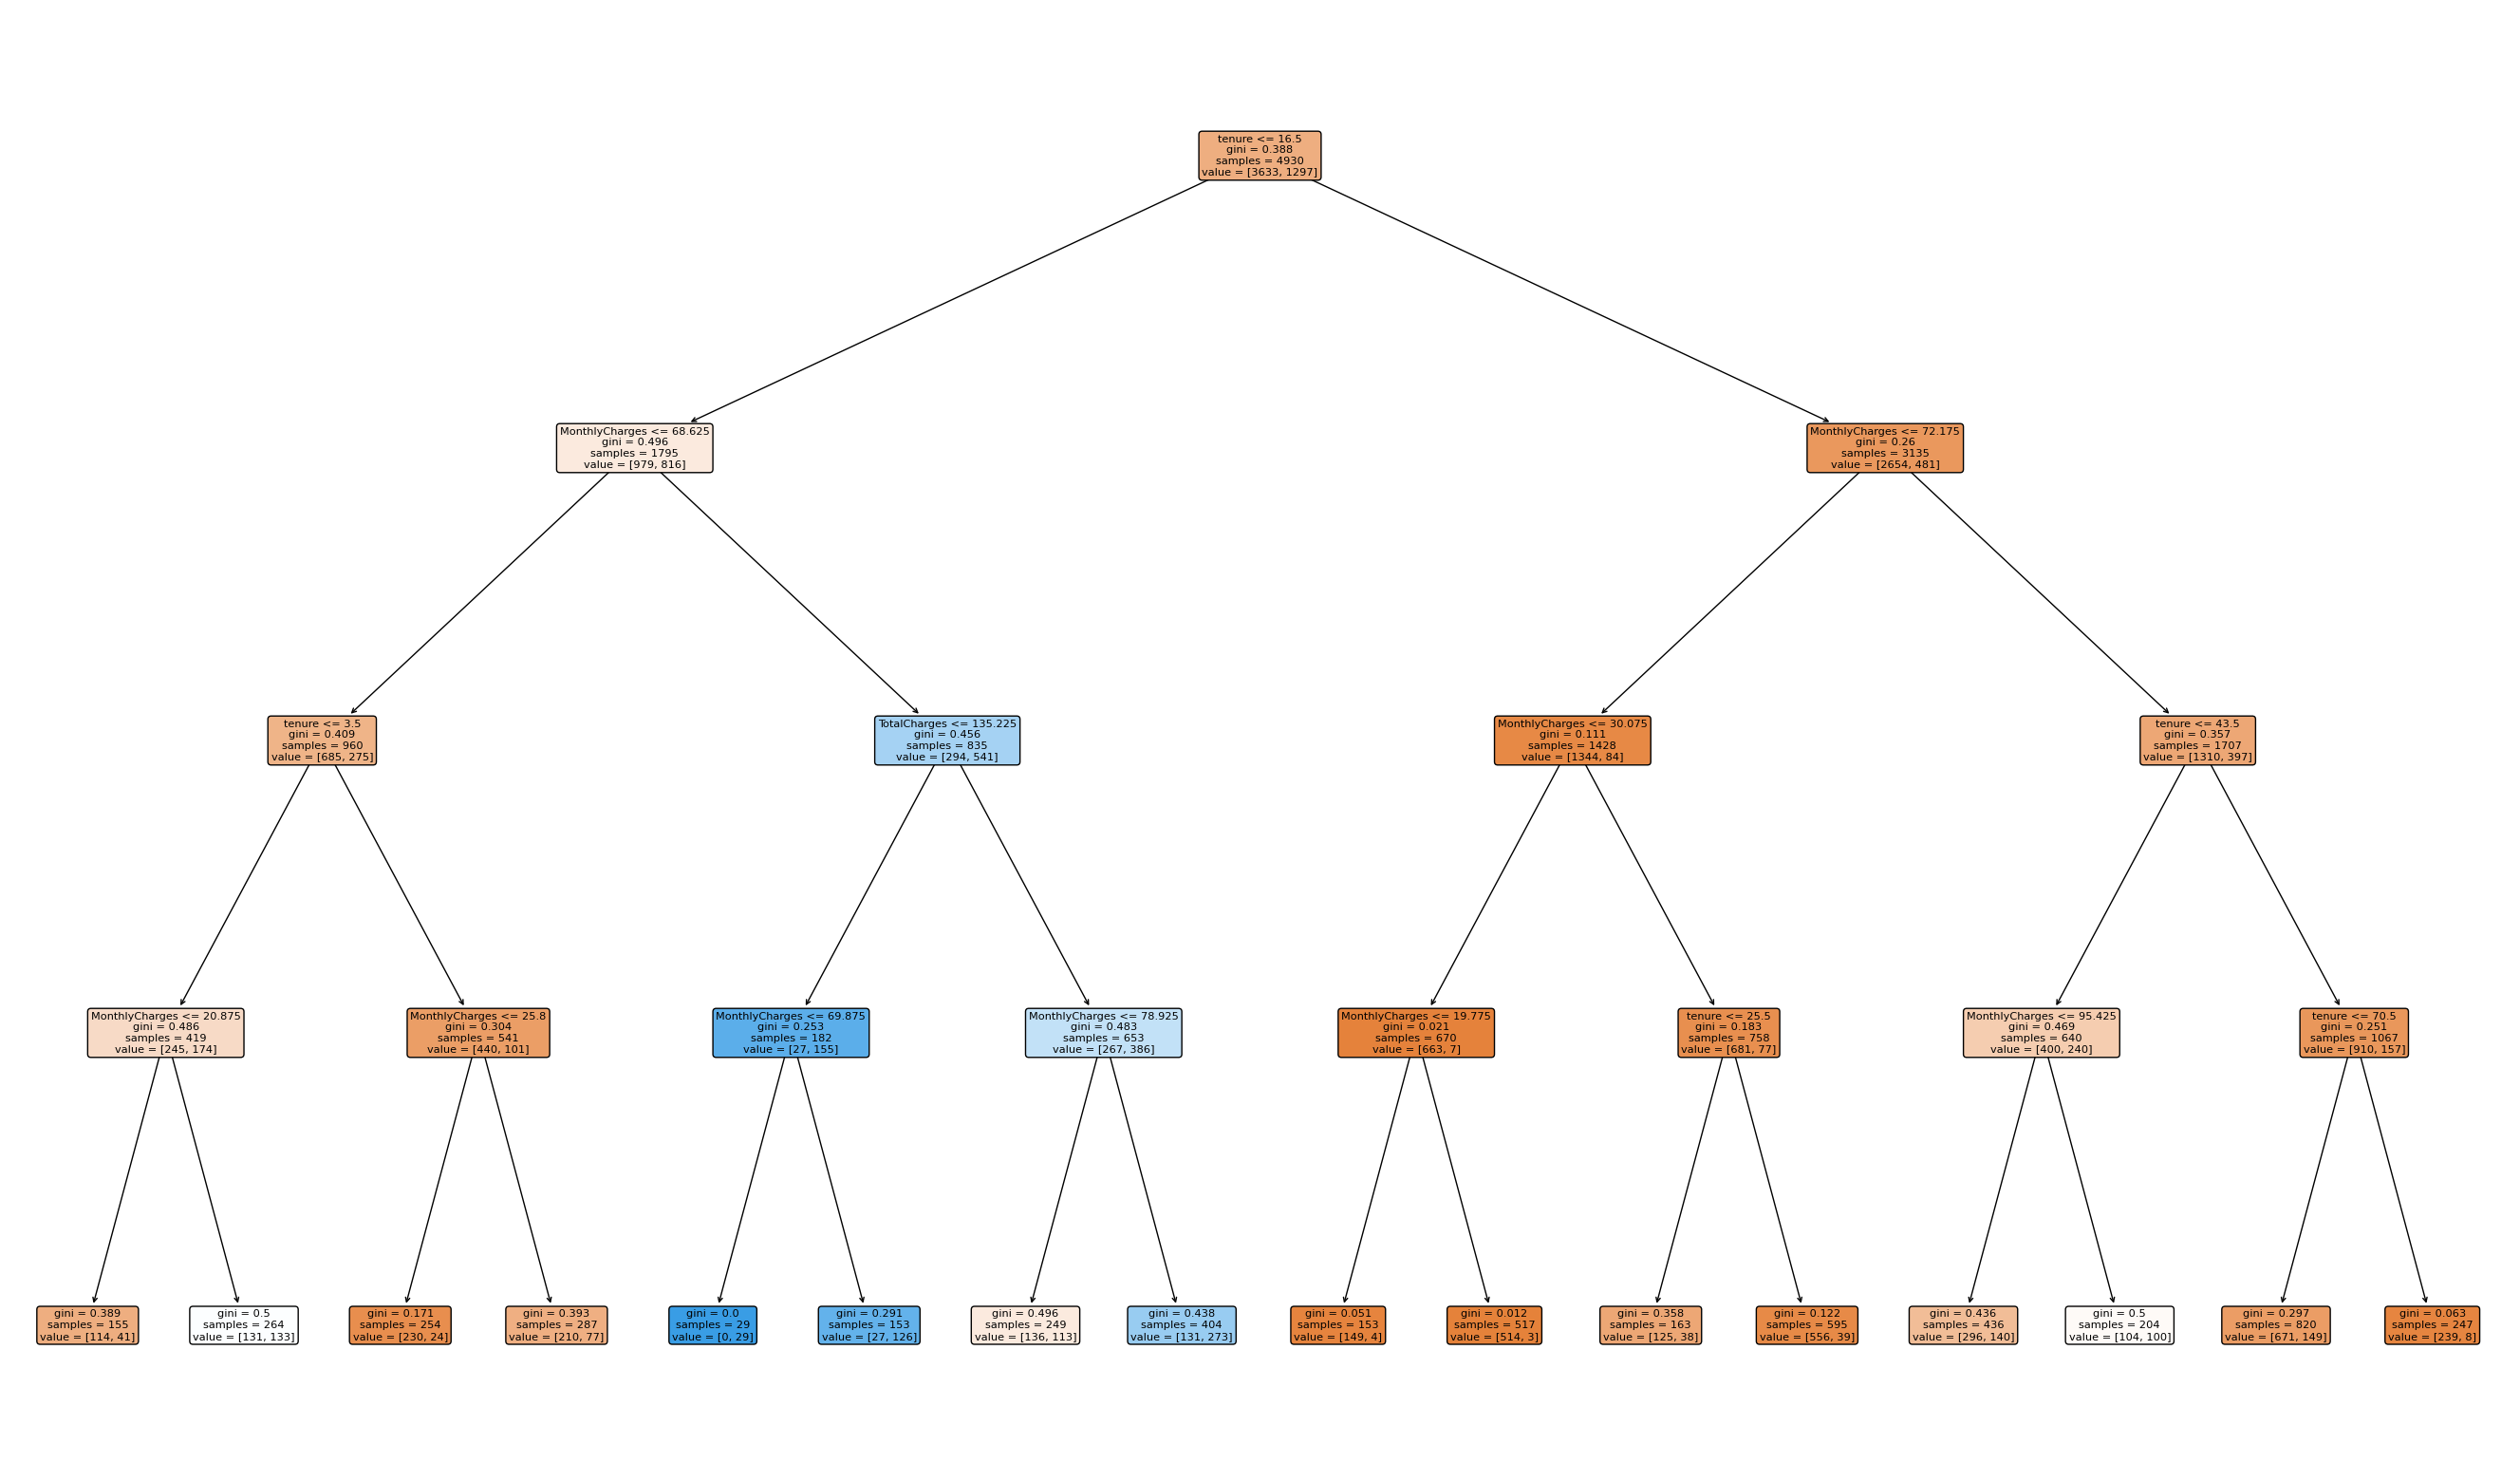

In [51]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

In [52]:
#Create a function that takes a list of integers as a parameter, 
#iterates over the range as depths, and prints the performance log of the decision tree for each depth

In [53]:
parameter = [i for i in range(1, 15)]

def Function(parameter, X_train, X_test, y_train, y_test):
    acc = []
    for i in parameter:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)

        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train, y_pred_train_dt),
                                                 precision_score(y_train, y_pred_train_dt),
                                                 recall_score(y_train, y_pred_train_dt)],
                                       'Test': [accuracy_score(y_test, y_pred_test_dt),
                                                precision_score(y_test, y_pred_test_dt),
                                                recall_score(y_test, y_pred_test_dt)]})

        acc.append(performance_df['Train'][0])
        display(i, performance_df)

    return acc


In [54]:
result = Function(parameter, X_train, X_test, y_train, y_test)

/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1

,Error_metric,Train,Test
0,Accuracy,0.74,0.73
1,Precision,0.00,0.00
2,Recall,0.00,0.00


2

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


3

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


4

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


5

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.69,0.64
2,Recall,0.45,0.39


6

,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.72,0.63
2,Recall,0.43,0.36


7

,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.73,0.62
2,Recall,0.49,0.40


8

,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.74,0.61
2,Recall,0.56,0.45


9

,Error_metric,Train,Test
0,Accuracy,0.84,0.76
1,Precision,0.81,0.60
2,Recall,0.53,0.39


10

,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.83,0.58
2,Recall,0.61,0.44


11

,Error_metric,Train,Test
0,Accuracy,0.88,0.75
1,Precision,0.83,0.54
2,Recall,0.70,0.45


12

,Error_metric,Train,Test
0,Accuracy,0.91,0.73
1,Precision,0.86,0.51
2,Recall,0.76,0.45


13

,Error_metric,Train,Test
0,Accuracy,0.92,0.74
1,Precision,0.90,0.52
2,Recall,0.81,0.47


14

,Error_metric,Train,Test
0,Accuracy,0.94,0.73
1,Precision,0.92,0.50
2,Recall,0.85,0.47


In [55]:
result

[0.7369168356997972,
 0.7870182555780934,
 0.7870182555780934,
 0.7920892494929006,
 0.8028397565922921,
 0.8058823529411765,
 0.818052738336714,
 0.8316430020283976,
 0.8442190669371197,
 0.8636916835699797,
 0.8841784989858013,
 0.9058823529411765,
 0.924340770791075,
 0.9391480730223124]

In [56]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

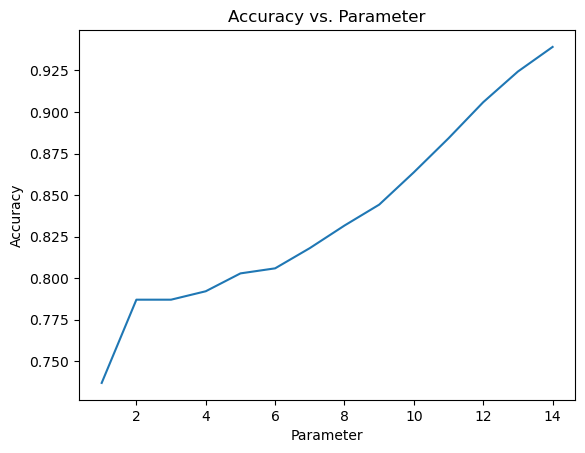

In [57]:
plt.plot(parameter, result)
plt.title('Accuracy vs. Parameter')
plt.xlabel('Parameter')
plt.ylabel('Accuracy')

In [58]:
# Split the Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
print("The (mean) accuracy on the test set is %.2f" %(model.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(X_train, y_train)))

The (mean) accuracy on the test set is 0.79
The (mean) accuracy on the train data is 0.79


In [ ]:
#Use SMOTE to balance the Data

In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)   #with fit we load the data in and we resample then
y_sm.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores=cross_val_score(model, X_sm, y_sm, cv=5) # 5 cv foldings
scores

array([0.74577295, 0.74138973, 0.78066465, 0.77160121, 0.76676737])

In [66]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.78 mean accuracy with a standard deviation of 0.01


In [ ]:
#Comparing the Models

In [70]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=5, scoring = 'recall'))
    scores[model_names[i]] = mean_score   #-> score in this case means accuracy
    i = i+1
print(scores)

{'Classification Tree': 0.7522913271296637, 'Logistic Regression': 0.7617139535834662, 'KNN': 0.8173028056709251}


In [71]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.75,0.76,0.82
